## Perkenalan
`Marchelly Gideon Tambunan`\

## Description
### Objective
`analisa perkembangan covid-19 di negara ASEAN`

### Problem Statement
`perkembangan kasus covid-19 di Asean`\
`Pertambahan kasus dari waktu ke waktu`\
`perbandingan kasus covid-19 antara Indonesia dengan Malaysia` \
`Jumlah kasus kematian tertinggi di negara malaysia`\
`Hubungan antara jumlah kasus sembuh dan meniggal`

### i. SQL Queries
SELECT *

FROM '`bigquery-public-data.covid19_jhu_csse_eu.summary`'

WHERE country_region IN ('Indonesia','Thailand','Vietnam','Brunei Darussalam','Malaysia', 'Singapura','Cambodia','Laos','Philippines','Myanmar')

### Import Pustaka yang dibutuhkan

In [2]:
import pandas as pd #import pandas
import numpy as np #import numpy

## ii. Data Loading

In [3]:
df = pd.read_csv('C:\H8_project\Hacktiv8_GC\h8dsft_P0GC1_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"]) #memuat library pada notebook

### Eksplorasi Data Sederhana

In [4]:
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Thailand,2020-03-03,15.000000,101.000000,POINT(101 15),43.0,1.0,31.0,NaN,NaN,NaN,NaN
1,NaN,Malaysia,2020-03-03,2.500000,112.500000,POINT(112.5 2.5),36.0,0.0,22.0,NaN,NaN,NaN,NaN
2,NaN,Vietnam,2020-03-03,16.000000,108.000000,POINT(108 16),16.0,0.0,16.0,NaN,NaN,NaN,NaN
3,NaN,Philippines,2020-03-03,13.000000,122.000000,POINT(122 13),3.0,1.0,1.0,NaN,NaN,NaN,NaN
4,NaN,Malaysia,2020-04-18,4.210484,101.975766,POINT(101.975766 4.210484),5305.0,88.0,3102.0,2115.0,NaN,NaN,Malaysia


In [5]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
15686,NaN,Thailand,2020-04-08,15.870032,100.992541,POINT(100.992541 15.870032),2369.0,30.0,888.0,1451.0,NaN,NaN,Thailand
15687,NaN,Thailand,2022-09-10,15.870032,100.992541,POINT(100.992541 15.870032),4667546.0,32539.0,NaN,NaN,NaN,NaN,Thailand
15688,NaN,Thailand,2022-02-27,15.870032,100.992541,POINT(100.992541 15.870032),2891927.0,22933.0,NaN,NaN,NaN,NaN,Thailand
15689,NaN,Thailand,2021-04-04,15.870032,100.992541,POINT(100.992541 15.870032),29127.0,95.0,26873.0,2159.0,NaN,NaN,Thailand
15690,NaN,Thailand,2021-01-30,15.870032,100.992541,POINT(100.992541 15.870032),18782.0,77.0,11615.0,7090.0,NaN,NaN,Thailand


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15691 entries, 0 to 15690
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  8534 non-null   object 
 1   country_region  15691 non-null  object 
 2   date            15691 non-null  object 
 3   latitude        15009 non-null  float64
 4   longitude       15009 non-null  float64
 5   location_geom   15009 non-null  object 
 6   confirmed       15689 non-null  float64
 7   deaths          15656 non-null  float64
 8   recovered       3797 non-null   float64
 9   active          3522 non-null   float64
 10  fips            0 non-null      float64
 11  admin2          0 non-null      float64
 12  combined_key    15387 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.6+ MB


## iii. Data Cleaning

Menangani missing values pada data yang didapat

In [7]:
df.isnull().sum()                                                                             #memeriksa apakah dataframe ada nilai null

province_state     7157
country_region        0
date                  0
latitude            682
longitude           682
location_geom       682
confirmed             2
deaths               35
recovered         11894
active            12169
fips              15691
admin2            15691
combined_key        304
dtype: int64

Dalam mengatasi missing value dari data yang kita dapat. langkah pertama yang harus kita lakukan adalah menghapus kolom yang tidak diperlukan. Kolom yang kita akan hapus antara lain `Latitude, longitude, location_geom, fips, admin2` Karena saya rasa combined_key dan lokasi dari data tersebut tidak dapat dicari insight nya, serta kolom fips dan admin itu memiliki nilai null pada indeks nya.

In [8]:
df.drop(['latitude', 'longitude', 'location_geom', 'fips', 'admin2', 'combined_key'], inplace = True, axis=1)       #menghapus kolom yang tidak digunakan

mengubah nama kolom menjadi bahasa yang lebih mudah dipahami

In [9]:
df.rename(                                    #mengubah nama pada kolom
    columns = {
        'province_state' : 'provinsi',
        'country_region' : 'negara',
        'date' : 'tanggal',
        'deaths' : 'meninggal',
        'recovered' : 'sembuh'},inplace = True)

Isi Missing Value pada kolom sembuh, active, confirmed, meninggal, provinsi menjadi `0` atau `none` Karena pada kolom provinsi kita mungkin akan membutuhkannya

In [10]:
df["sembuh"].fillna("0", inplace = True)
df["active"].fillna("0", inplace = True)
df["provinsi"].fillna("Unknown", inplace = True)
df["confirmed"].fillna("0", inplace = True)
df["meninggal"].fillna("0", inplace = True)

cek apakah data sudah bersih

In [11]:
df.isnull().sum()                                                                             #memeriksa apakah dataframe ada nilai null

provinsi     0
negara       0
tanggal      0
confirmed    0
meninggal    0
sembuh       0
active       0
dtype: int64

Mengubah Tipe Data Sesuai Kebutuhan

In [12]:
convert_dict = {'confirmed': int,
                'meninggal': int,
                'sembuh': int,
                'active': int,
                'tanggal': 'datetime64[ns]'
                }
 
df = df.astype(convert_dict)
print(df.dtypes)

provinsi             object
negara               object
tanggal      datetime64[ns]
confirmed             int32
meninggal             int32
sembuh                int32
active                int32
dtype: object


# iv. Data Query


pertama kita akan mengurutkan tanggal terlebih dahulu agar lebih mudah dipahami

In [14]:
df.sort_values('tanggal', inplace=True, ignore_index = True)

##### pada langkah ini kita akan melakukan Beberapa data query untuk melihat kasus aktif dan sembuh dari covid-19 di `Indonesia`

In [16]:
df_id = df[
    # query data country untuk indonesia
      (df['negara'].isin(['Indonesia']))
    & (df['sembuh'] > 10000)
    & (df['active'] > 10000)
    ]
df_id

,provinsi,negara,tanggal,confirmed,meninggal,sembuh,active
845,Unknown,Indonesia,2020-06-07,31186,1851,10498,18837
848,Unknown,Indonesia,2020-06-08,32033,1883,10904,19246
856,Unknown,Indonesia,2020-06-09,33076,1923,11414,19739
867,Unknown,Indonesia,2020-06-10,34316,1959,12129,20228
869,Unknown,Indonesia,2020-06-11,35295,2000,12636,20659
...,...,...,...,...,...,...,...
3777,Unknown,Indonesia,2021-07-31,3409658,94119,2770092,545447
3784,Unknown,Indonesia,2021-08-01,3440396,95723,2809538,535135
3788,Unknown,Indonesia,2021-08-02,3462800,97291,2842345,523164
3798,Unknown,Indonesia,2021-08-03,3496700,98889,2873669,524142


dapat dilihat bahwa dari data tersebut terdapat peningkatan kasus aktif sebesar `505.174` dan yang sembuh sekitar `2.897.422` orang akibat covid-19 dari `7 juni 2020` hingga `4 agustus 2021`

##### selanjutnya, kita akan melihat orang yang terkonfirmasi covid-19 di `Philippines`

In [78]:
df_ph = df.query(
        "negara == 'Philippines'& \
        tanggal <= '2021-06-30'&  \
        tanggal >= '2020-04-01'"
)[      
        ['provinsi','tanggal','confirmed']
]
df_ph

,provinsi,tanggal,confirmed
378,Unknown,2020-04-01,2311
385,Unknown,2020-04-02,2633
389,Unknown,2020-04-03,3018
393,Unknown,2020-04-04,3094
403,Unknown,2020-04-05,3246
...,...,...,...
3534,Unknown,2021-06-26,1391911
3538,Unknown,2021-06-27,1397992
3543,Unknown,2021-06-28,1403588
3554,Unknown,2021-06-29,1408058


Dari hasil diatas dapat dilihat bahwa selama kurang lebih 1 tahun orang yang terkonfirmasi covid-19 meningkat sangat jauh

##### Perbandingan Orang yang Sembuh dari covid-19 di `Malaysia` pada Kuartal 4 Tahun 2020 sd Kuartal 1 2021

In [43]:
df_my = df[
              df['negara'].isin(['Malaysia']) 
            &(df['tanggal'] >= '2020-12-01') 
            &(df['tanggal'] <= '2021-03-31')
][  
    ['provinsi','negara','tanggal','sembuh','confirmed']
]
df_my

,provinsi,negara,tanggal,sembuh,confirmed
2081,Unknown,Malaysia,2020-12-01,56311,67169
2090,Unknown,Malaysia,2020-12-02,56969,68020
2099,Unknown,Malaysia,2020-12-03,57917,69095
2103,Unknown,Malaysia,2020-12-04,59061,70236
2114,Unknown,Malaysia,2020-12-05,60204,71359
...,...,...,...,...,...
2898,Unknown,Malaysia,2021-03-27,325182,340642
2902,Unknown,Malaysia,2021-03-28,326309,341944
2912,Unknown,Malaysia,2021-03-29,327406,342885
2913,Unknown,Malaysia,2021-03-30,328554,344018


terdapat peningkatan sekitar `300%` orang yang sembuh dari covid-19

### v. Data Groupping

##### Jumlah rata - rata kasus untuk setiap provinsi di `Malaysia`

In [60]:
dfmy_mean = df[
    (df['negara'] == 'Malaysia')
    ]
dfmy_mean.groupby('provinsi').mean().sort_values('meninggal', ascending=False)

,confirmed,meninggal,sembuh,active
provinsi,,,,
Selangor,1.206321e+06,11677.432271,17.689243,0.000000
Johor,3.398186e+05,4603.326693,6.000000,0.000000
Sabah,3.385831e+05,3320.207171,4.057769,0.000000
W.P. Kuala Lumpur,3.407084e+05,3105.113546,4.764940,0.000000
Kedah,2.597380e+05,2700.511952,3.406375,0.000000
Pulau Pinang,2.466759e+05,2105.862550,2.384462,0.000000
Sarawak,2.894748e+05,1937.589641,1.414343,0.000000
Perak,1.867025e+05,1904.762948,1.543825,0.000000
Negeri Sembilan,1.805396e+05,1607.980080,2.364542,0.000000


Jumlah kematian rata rata terbanyak berada di propinsi `Selangor` dengan 11 ribu kasus 

##### Jumlah kasus kematian terbanyak setiap negara pada januari sd juni 2021

In [62]:
df.groupby('negara').max().sort_values('meninggal',ascending=False)

,provinsi,tanggal,confirmed,meninggal,sembuh,active
negara,,,,,,
Malaysia,W.P. Putrajaya,2023-02-05,2127934,624641,962733,210522
Indonesia,Unknown,2023-02-05,6731135,160832,2907920,574135
Philippines,Unknown,2023-02-05,4200225,65851,1528422,203710
Vietnam,Unknown,2023-02-05,11529639,43186,54332,125097
Thailand,Unknown,2023-02-05,4752782,34668,26873,640009
Cambodia,Unknown,2023-02-05,138698,3056,72803,12020
Laos,Unknown,2023-02-05,217990,758,3804,3616


jumlah kematian terbanyak berada di Malaysia yang berada di provinsi `W.P. Putrajaya`

In [70]:
dfid = df[
    (df['negara'] == 'Indonesia')
    ]
dfid.groupby('provinsi').max().sort_values('meninggal', ascending=False)

,negara,tanggal,confirmed,meninggal,sembuh,active
provinsi,,,,,,
Unknown,Indonesia,2023-02-05,6731135,160832,2907920,574135


dari data diatas dapat dilihat bahwa angka kematian tertinggi berada pada tanggal `5 februari 2023`

### vi. Data Visualization

#### Jumlah kasus Orang meninggal akibat covid-19

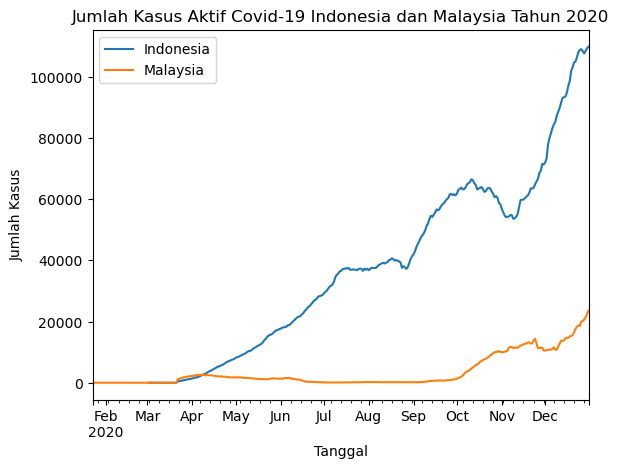

In [73]:
df[ 
    df['negara'].isin(['Indonesia','Malaysia']) 
    & (df['tanggal'] >= '2020-01-01')
    & (df['tanggal'] <= '2020-12-31')
][  
    ['active','tanggal','negara']
].set_index('tanggal').groupby('negara')['active'].plot(kind='line',title='Jumlah Kasus Aktif Covid-19 Indonesia dan Malaysia Tahun 2020',
                                                        xlabel='Tanggal',ylabel='Jumlah Kasus', legend=True);

Terdapat jumlah kasus aktif yang setara pada bulan `Februari` hingga `April`. Namun Setelah bulan April indonesia mengalami kenaikan yang sangat signifikan hingga bulan Desember

##### Hubungan Antara Jumlah Kematian dan Sembuh di tahun 2020 di Malaysia

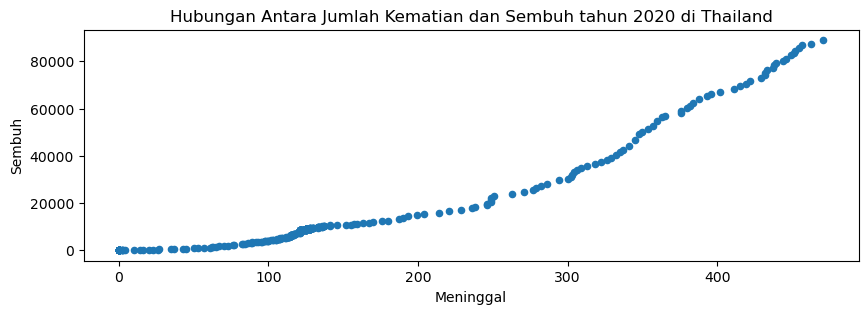

In [77]:
df[ 
    df['negara'].isin(['Malaysia']) 
    & (df['tanggal'] >= '2020-01-01')
    & (df['tanggal'] <= '2020-12-31')
][  
    ['negara','sembuh','meninggal']
].groupby(['negara']).plot(title='Hubungan Antara Jumlah Kematian dan Sembuh tahun 2020 di Thailand',
                            kind='scatter', x='meninggal', y='sembuh', xlabel= 'Meninggal', ylabel='Sembuh',
                            legend=True, figsize=(10,3));

tenyata dari hasil grafik diatas, semakin tinggi orang yang `sembuh`, semakin tinggi pula orang yang `meninggal` akibat covid-19

#### Jumlah pasien covid-19 pada tiap Provinsi di Malaysia

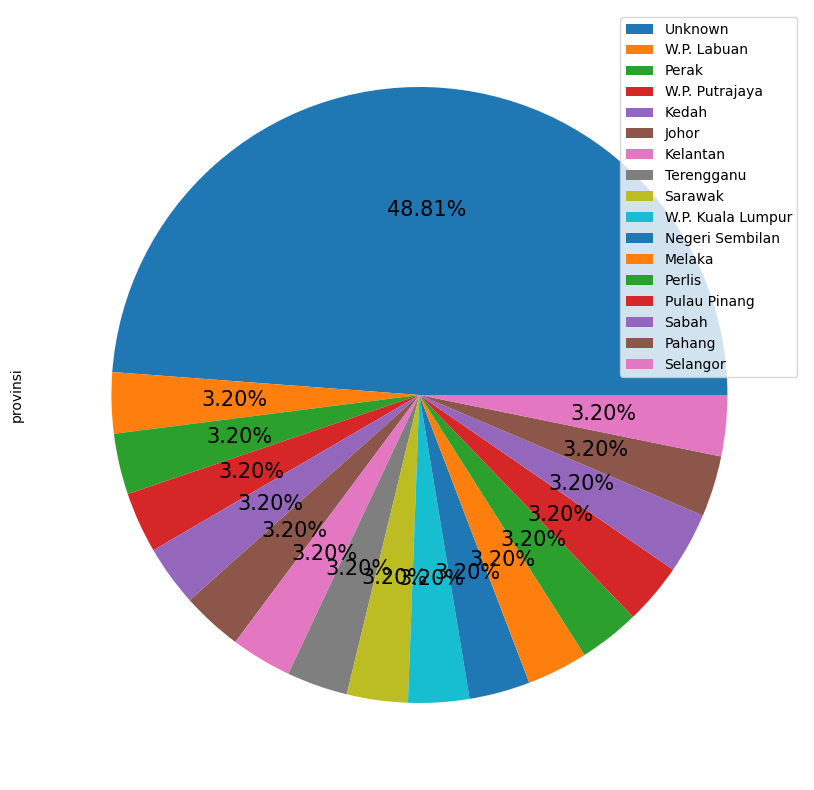

In [ ]:
df_id = df['provinsi'].value_counts('confirmed').plot(kind='pie',figsize=(10,10),autopct='%.2f%%',fontsize=15,legend=True,labels=None);

ternyata di tiap provinsi di negara `Malaysia`memiliki presentase yang sama kecuali pada provinsi yang tidak diketahui

## vii Overall Analysis

#### Conclusions
1. Jumlah kasus aktif di Indonesia dan Malaysia pada awalnya hampir setara. Namun Indonesia mengalami kenaikan yang signifikan setelah `april 2020`
2. Jumlah kematian rata rata terbanyak berada di propinsi `Selangor` dengan 11 ribu kasus 
3. Semakin tinggi kesembuhan semakin tinggi pula angka kematian namun tidak sebanding
4. Kematian tertinggi berada pada indoensia
5. presentase covid-19 di berbagai provinsi di malaysia hampir sama